Linear Regression

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [2]:
# Loading the data  
data = pd.read_csv(r"C:\Users\aniketh\Downloads\Churn\Churn_Modelling.csv") 

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#numerical stats
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#missing values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

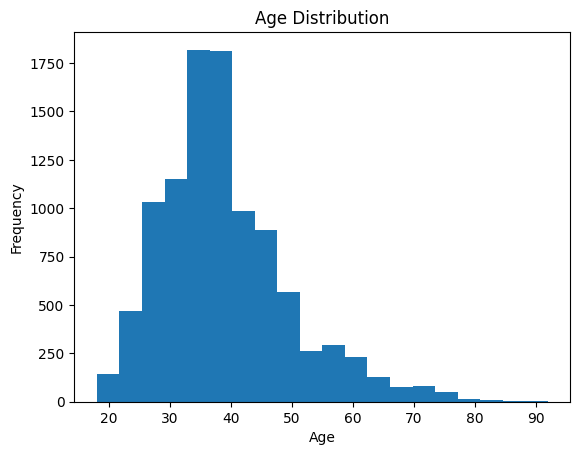

In [14]:
#Histogram for Age distribution
data['Age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.show()

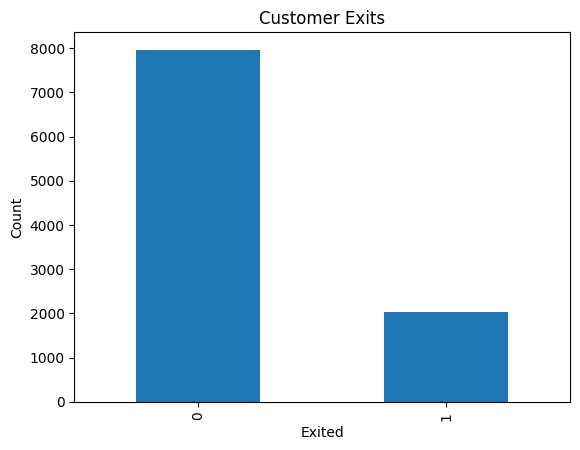

In [15]:
#Bar plot for Exited
data['Exited'].value_counts().plot(kind='bar', title='Customer Exits')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

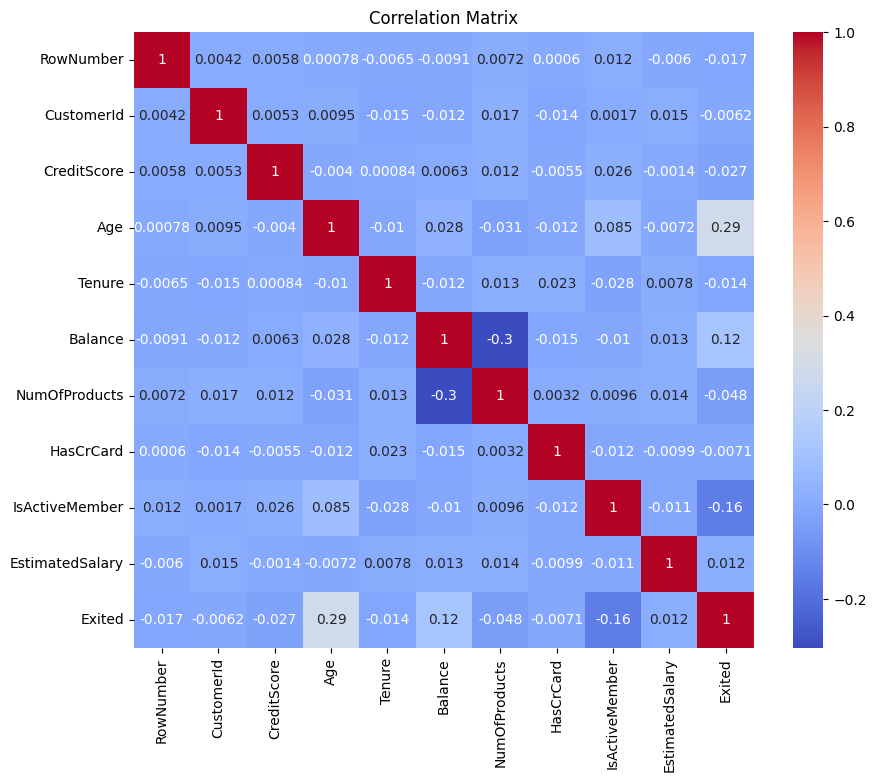

In [18]:
# Correlation matrix
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

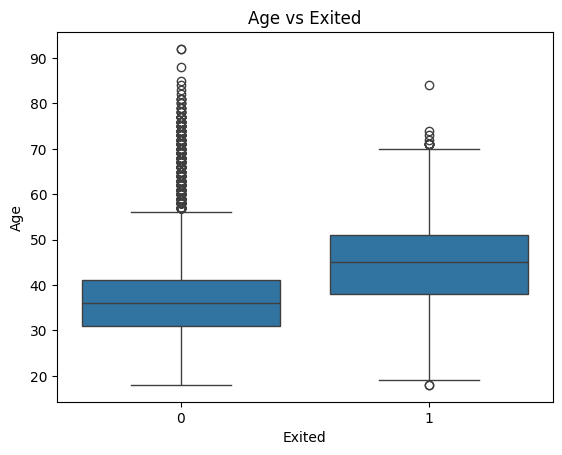

In [20]:
#Analyzing impact of Age on Exited
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age vs Exited')
plt.show()

In [22]:
data = pd.get_dummies(data = data,drop_first=True)
print(data)

      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
0                 1          1               1        101348.88  ...   
1                 1          0         

Train-Test Split

In [24]:
# Define the target variable and feature variables
X = data.drop(columns=['Exited', 'RowNumber', 'CustomerId'])  # Exclude unnecessary columns
y = data['Exited']  # Target variable

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abbie,Surname_Abbott,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,...,False,False,False,False,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,...,False,False,False,False,False,False,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,...,False,False,False,False,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,...,False,False,False,False,False,False,False,False,True,False


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (8000, 2942)
x test:  (2000, 2942)
y train:  (8000,)
y test:  (2000,)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.06400724e-04  1.10386538e-02 -3.04959209e-04 ...  1.31552638e-01
  8.13492734e-03 -7.87302469e-02]
Intercept: -0.23825697193111708


In [38]:
# Evaluate the model using Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1685199578626671


In [39]:
error= y_test-y_pred
print(error)

6252   -0.154341
4684    0.059202
1731   -0.374811
4742   -0.412619
4521   -0.176368
          ...   
6412    0.701694
8285    0.249118
7853    0.585400
1095    1.042839
6929    0.786531
Name: Exited, Length: 2000, dtype: float64


<Axes: ylabel='Exited'>

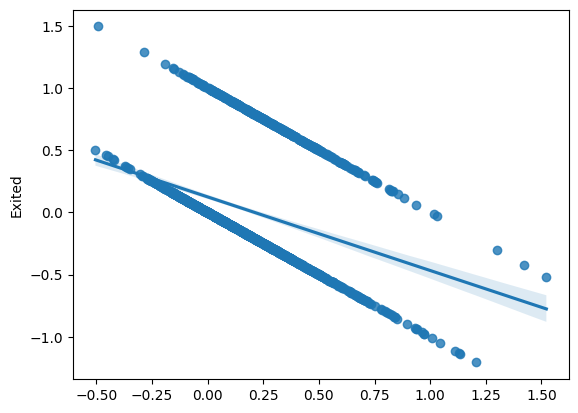

In [40]:
sns.regplot(x=y_pred, y=error, data=data)